In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd 

In [3]:
dataset=pd.read_csv("Bank_Customer_Churn_Prediction.csv")

In [4]:
dataset

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [5]:
dataset.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
dataset.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [48]:
dataset = dataset.drop(columns=['country', 'gender'])

In [49]:
dataset

customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9997            0              1          42085.58      1  
9998            1              0          92888.52      1  
9999            1              0          38190.78      0  

[10000 rows x 10 columns]

In [50]:
dataset.cov()

customer_id  credit_score           age       tenure  \
customer_id       5.174815e+09  36905.141215   7164.938021 -3096.345023   
credit_score      3.690514e+04   9341.860157     -4.019150     0.235355   
age               7.164938e+03     -4.019150    109.994084    -0.303229   
tenure           -3.096345e+03      0.235355     -0.303229     8.364673   
balance          -5.574297e+07  37804.076998  18525.333354 -2211.394696   
products_number   7.101372e+02      0.687999     -0.187157     0.022616   
credit_card      -4.599040e+02     -0.240492     -0.056036     0.029773   
active_member     5.986129e+01      1.239139      0.448026    -0.040997   
estimated_salary  6.317611e+07  -7694.701048  -4343.372926  1294.686597   
churn            -1.810269e+02     -1.054722      1.205250    -0.016309   

                       balance  products_number  credit_card  active_member  \
customer_id      -5.574297e+07       710.137218  -459.904002      59.861288   
credit_score      3.780408e+04         0.687999    -0.240492       1.239139   
age               1.852533e+04        -0.187157    -0.056036       0.448026   
tenure           -2.211395e+03         0.022616     0.029773      -0.040997   
balance           3.893436e+09    -11039.815064  -422.619801    -314.483074   
products_number  -1.103982e+04         0.338322     0.000844       0.002794   
credit_card      -4.226198e+02         0.000844     0.207791      -0.002703   
active_member    -3.144831e+02         0.002794    -0.002703       0.249797   
estimated_salary  4.592389e+07       475.147781  -260.410522    -328.292660   
churn             2.978932e+03        -0.011203    -0.001310      -0.031429   

                  estimated_salary        churn  
customer_id           6.317611e+07  -181.026889  
credit_score         -7.694701e+03    -1.054722  
age                  -4.343373e+03     1.205250  
tenure                1.294687e+03    -0.016309  
balance               4.592389e+07  2978.931708  
products_number       4.751478e+02    -0.011203  
credit_card          -2.604105e+02    -0.001310  
active_member        -3.282927e+02    -0.031429  
estimated_salary      3.307457e+09   280.204670  
churn                 2.802047e+02     0.162223

In [51]:
dataset.corr()

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030680    -0.011721       0.085472   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
customer_id               0.015271 -0.006248  
credit_score             -0.001384 -0.027094  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

In [54]:
dataset[['active_member','credit_score']].corr()

active_member  credit_score
active_member       1.000000      0.025651
credit_score        0.025651      1.000000

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#This imports the variance_inflation_factor function from statsmodels, which is used to calculate VIF.

#X--X is expected to be a pandas DataFrame containing independent variables.
def calc_vif(X):
    
    #This initializes an empty pandas DataFrame to store VIF values.
    vif=pd.DataFrame() 

    #This adds a column "variables" to the DataFrame containing the names of the independent variables
    vif["variables"]=X.columns  
      
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [56]:
dataset.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [57]:
calc_vif(dataset[['tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn']])

variables       VIF
0            tenure  3.481944
1           balance  2.254423
2   products_number  4.925817
3       credit_card  3.021991
4     active_member  1.981699
5  estimated_salary  3.521361
6             churn  1.285375

In [7]:
from scipy.stats import ttest_ind, ttest_rel

# Independent Sample T-Test
dataset = dataset.dropna()
male = dataset.loc[dataset['gender'] == 'Male', 'estimated_salary']
female = dataset.loc[dataset['gender'] == 'Female', 'estimated_salary']
print(ttest_ind(male, female))

# Dependent Sample Paired T-Test
male_balance = dataset.loc[dataset['gender'] == 'Male', 'balance']
male_credit_score = dataset.loc[dataset['gender'] == 'Male', 'credit_score']
print(ttest_rel(male_balance, male_credit_score))

TtestResult(statistic=-0.8111794562250657, pvalue=0.4172819312945406, df=9998.0)
TtestResult(statistic=90.2467019039785, pvalue=0.0, df=5456)


In [13]:
dataset.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [21]:
#Anavo--Analysis of variance
#one way classification:


In [19]:
f_stat, p_value = stats.f_oneway(
    dataset[dataset['products_number'] == 1]['estimated_salary'],
    dataset[dataset['products_number'] == 2]['estimated_salary'],
    dataset[dataset['products_number'] == 3]['estimated_salary'],
    dataset[dataset['products_number'] == 4]['estimated_salary']
)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.5f}")

F-statistic: 0.858, P-value: 0.46206


In [20]:
if p_value < 0.05:
    print("Significant difference exists between groups.")
else:
    print("No significant difference between groups.")

No significant difference between groups.


In [22]:
#ANOVA Two way analysis

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset into a DataFrame
df = dataset  # Ensure dataset is a Pandas DataFrame

# Run Two-Way ANOVA
model = smf.ols('credit_score ~ C(gender) + C(country) + C(gender):C(country)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                            sum_sq      df         F    PR(>F)
C(gender)             7.250269e+02     1.0  0.077584  0.780604
C(country)            7.426328e+03     2.0  0.397341  0.672116
C(gender):C(country)  6.722585e+03     2.0  0.359687  0.697904
Residual              9.339435e+07  9994.0       NaN       NaN


In [23]:
import seaborn as sns

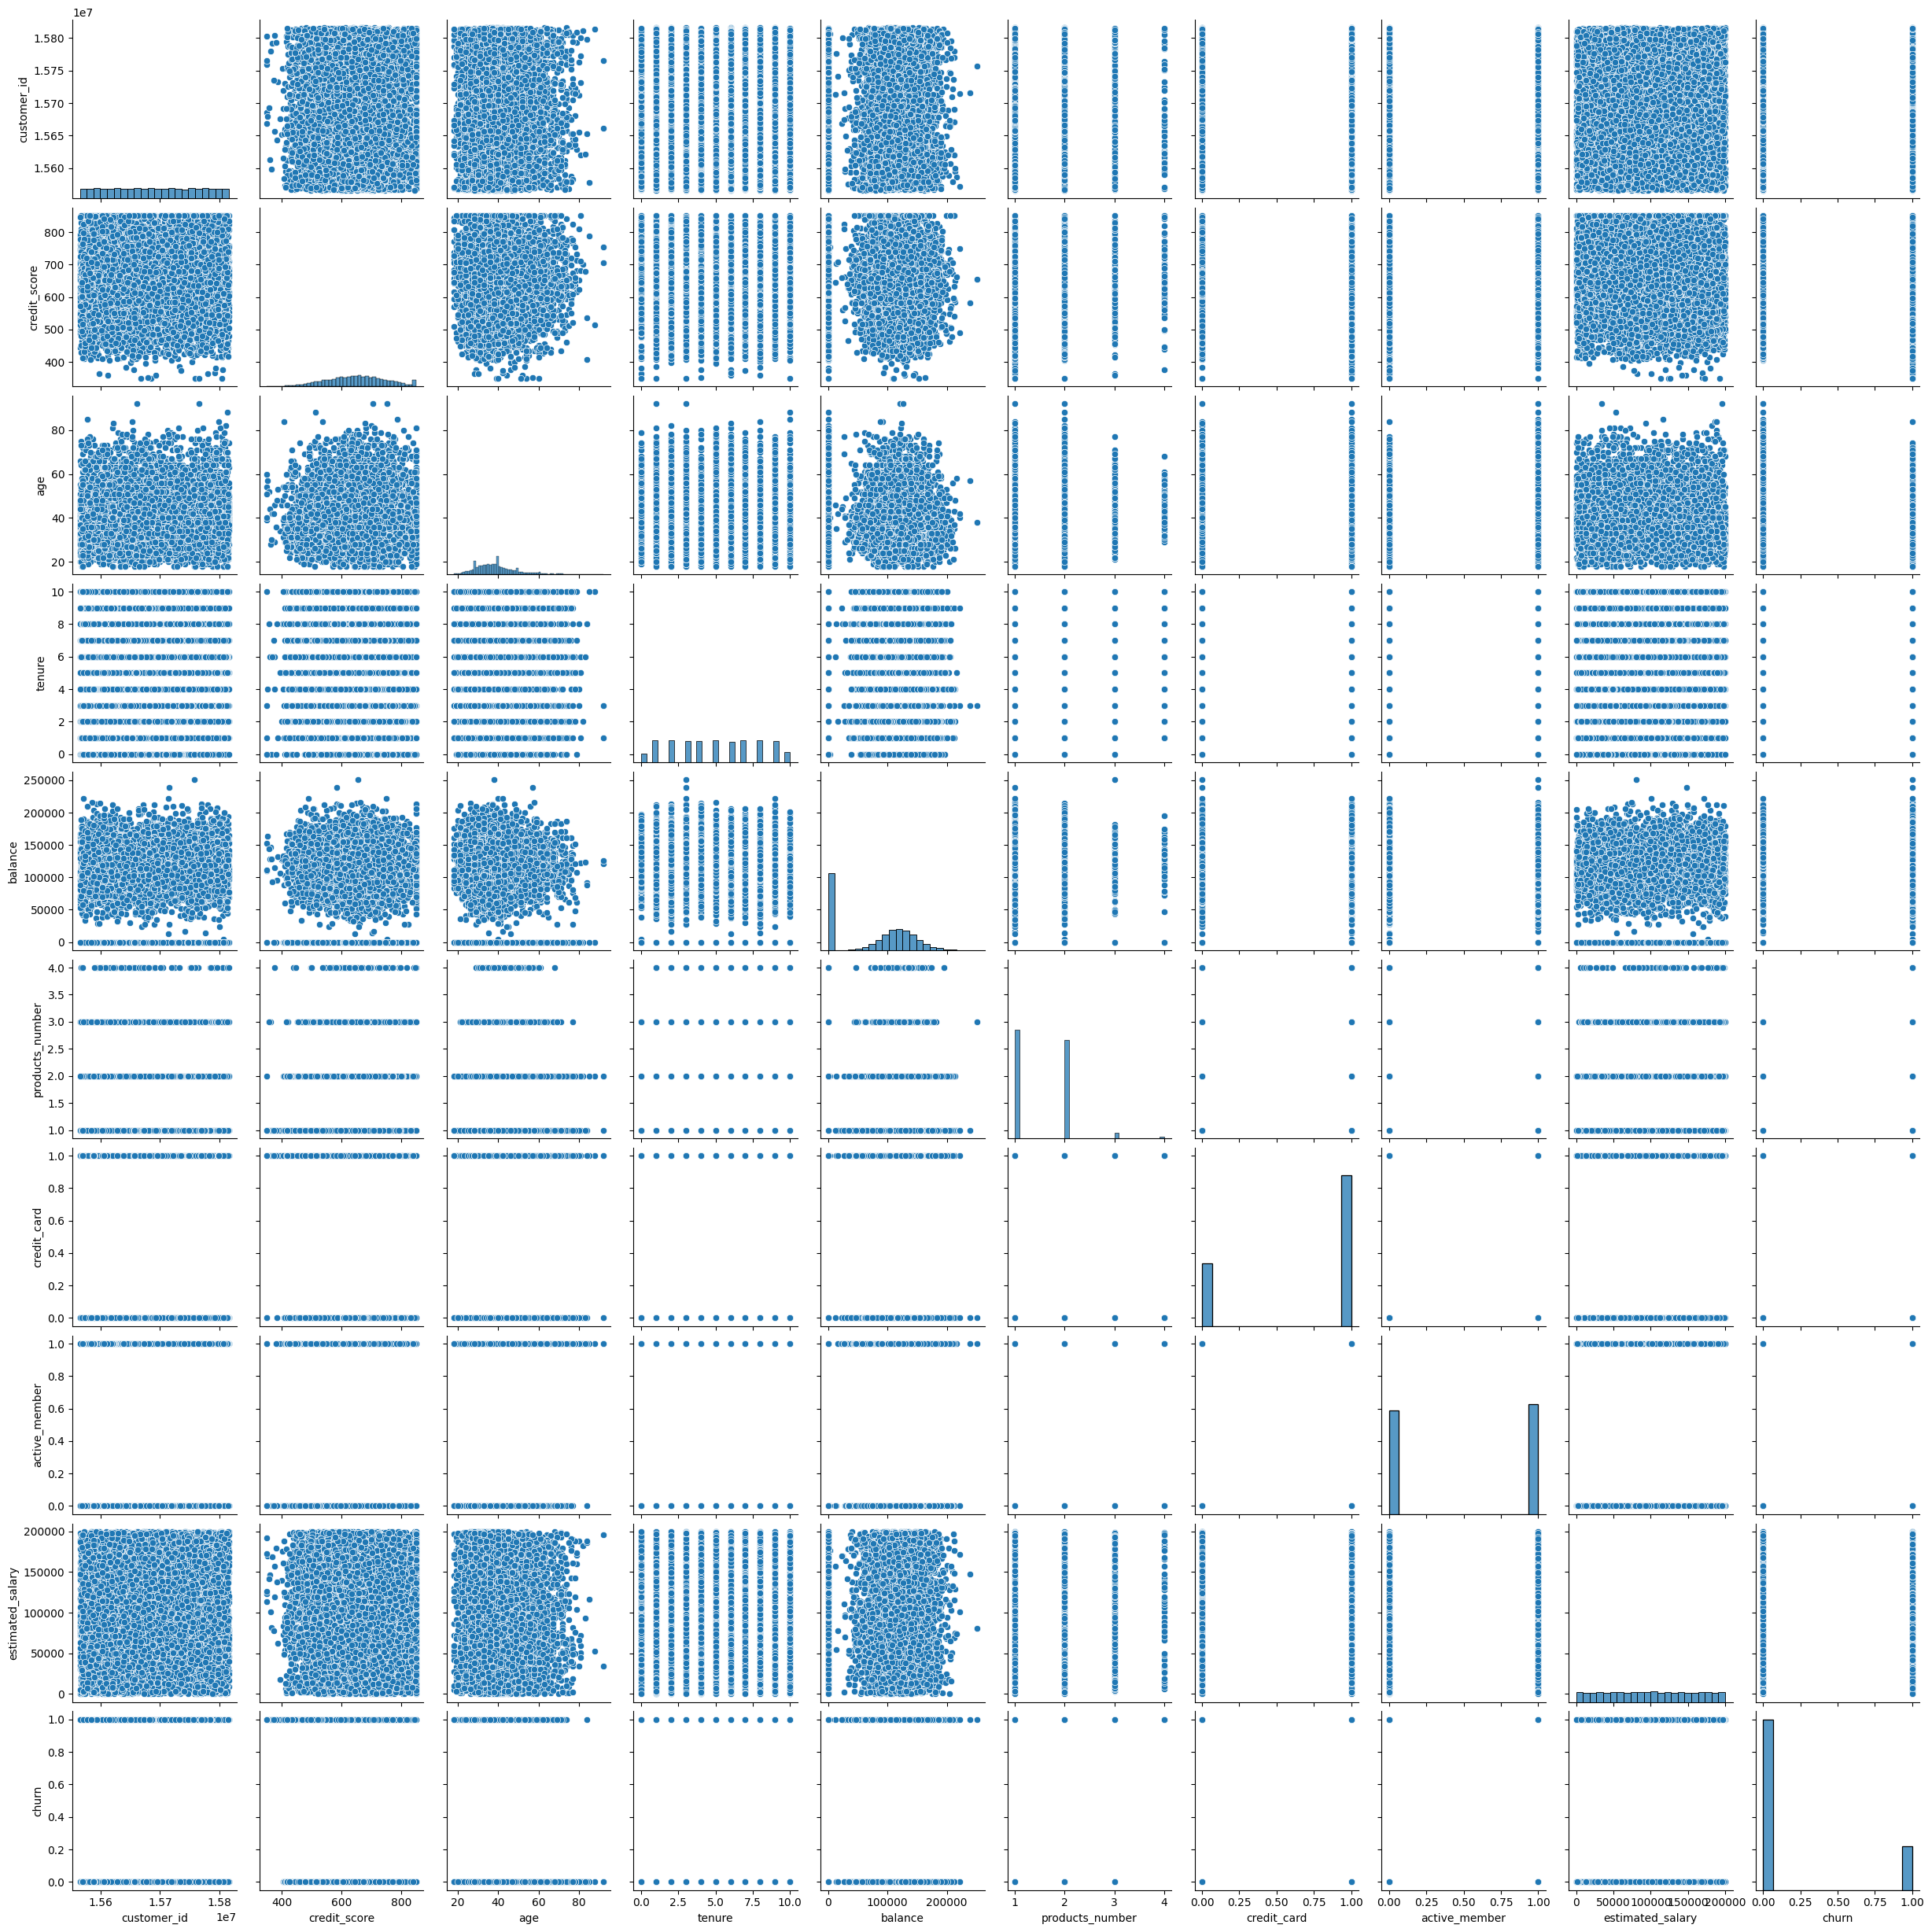

In [24]:
sns.pairplot(dataset)

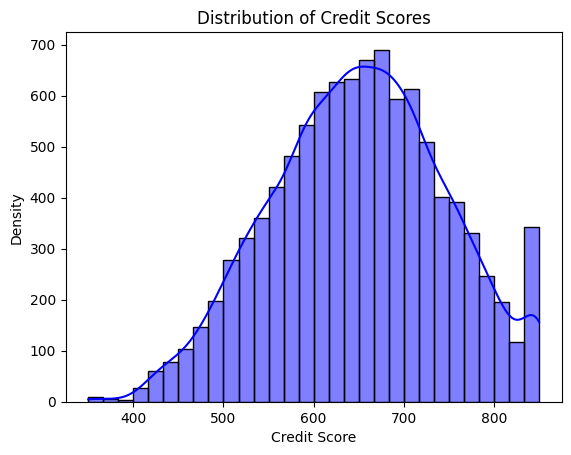

In [42]:
import seaborn as sb
sns.histplot(dataset['credit_score'], bins=30, kde=True, color='blue', line_kws={'color': 'red'})

plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

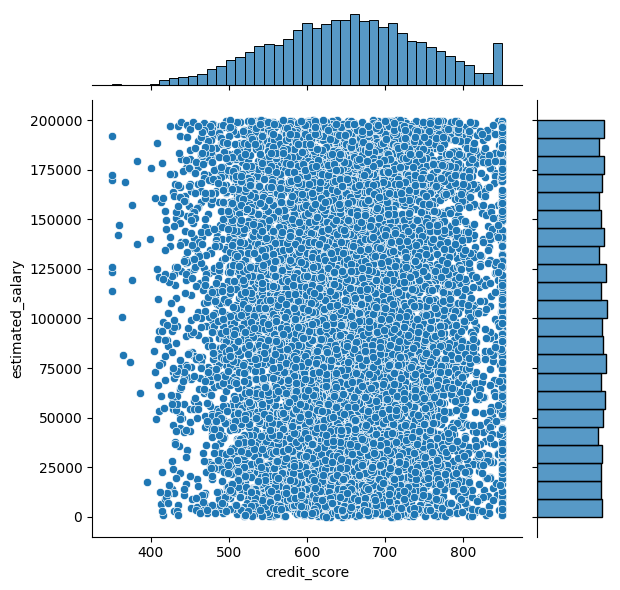

In [43]:
sns.jointplot(x='credit_score', y='estimated_salary', data=dataset, kind='scatter')
plt.show()

In [ ]:
#If points form an upward trend, higher credit scores correlate with higher salaries.
#If downward, higher credit scores correlate with lower salaries.

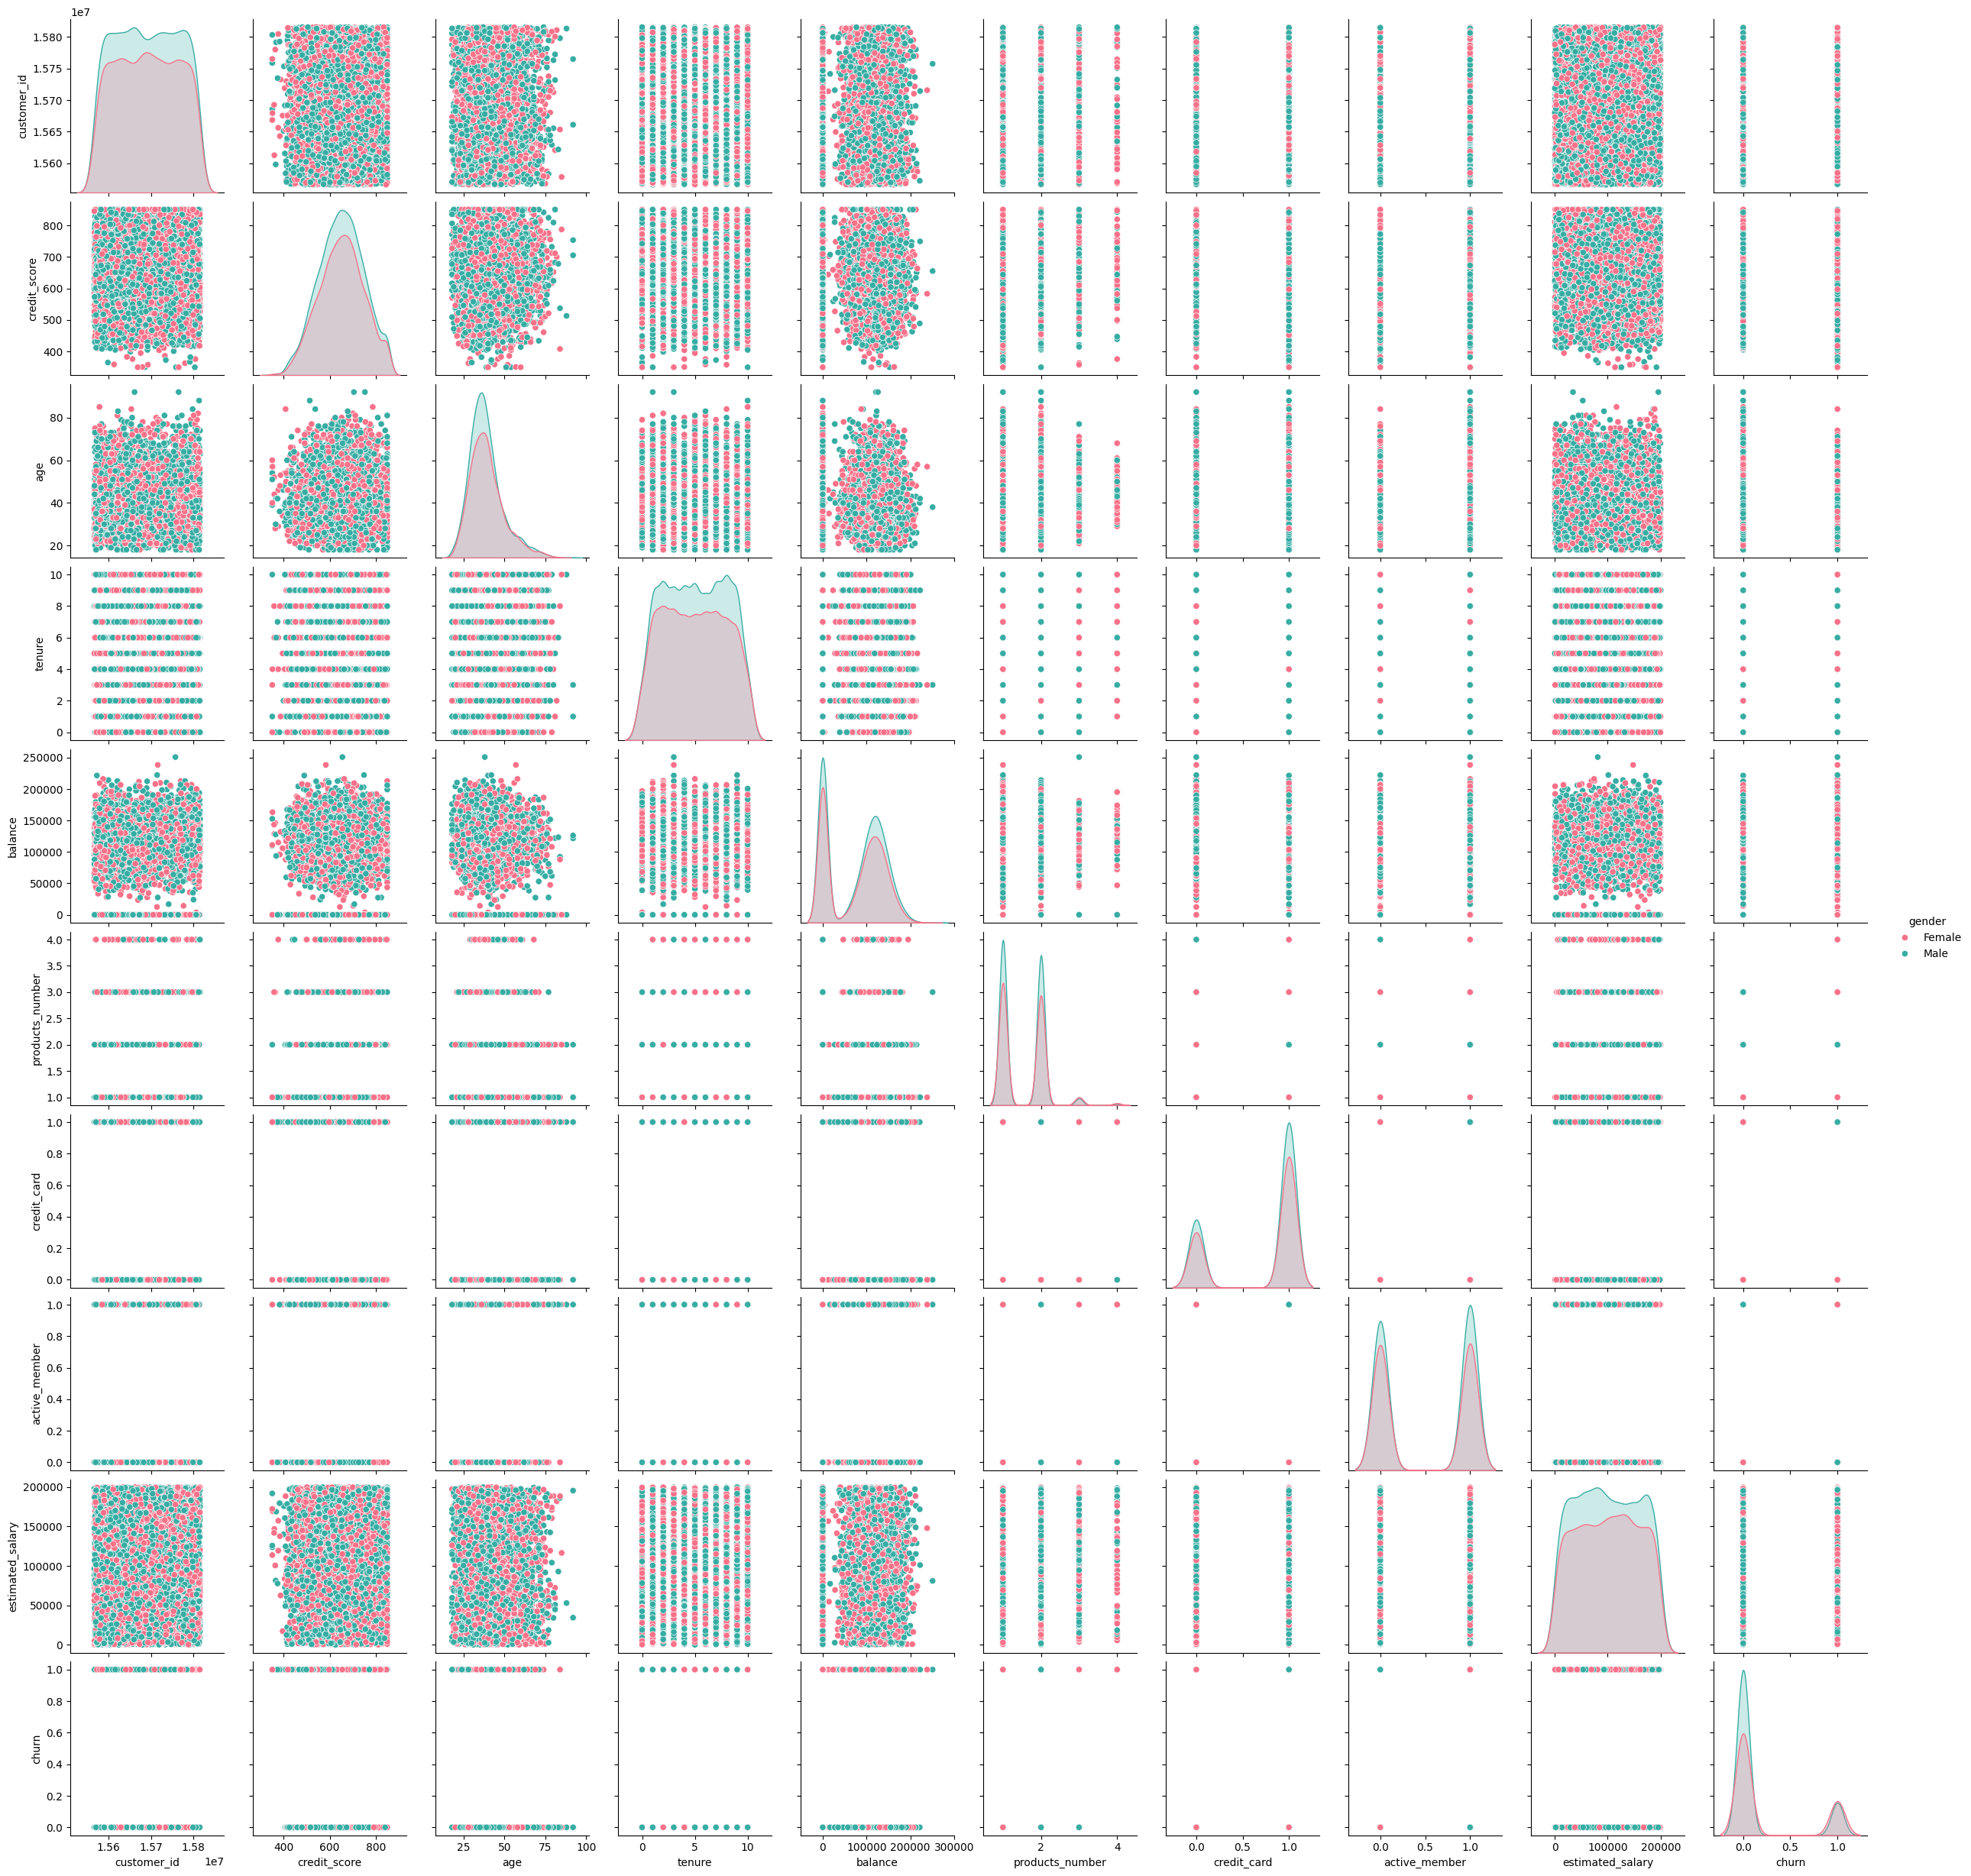

In [33]:
sb.pairplot(dataset,hue='gender',diag_kind='kde',kind='scatter',palette='husl')
plt.show()

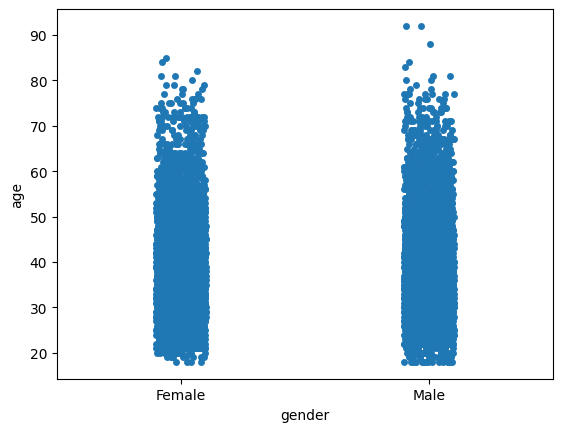

In [36]:
sb.stripplot(x = 'gender', y= 'age', data=dataset)
plt.show()

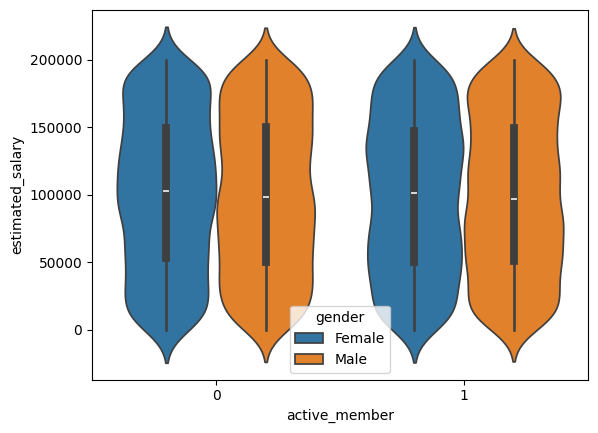

In [45]:
sb.violinplot(x='active_member',y='estimated_salary',data=dataset,hue='gender')
plt.show()

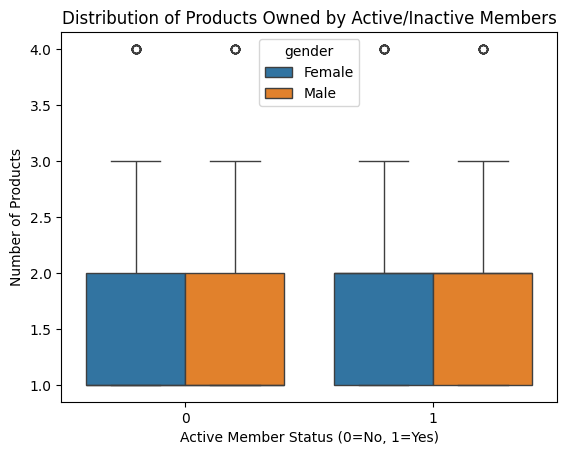

In [41]:
sb.boxplot(x='active_member',y='products_number',data=dataset,hue='gender')
plt.show()

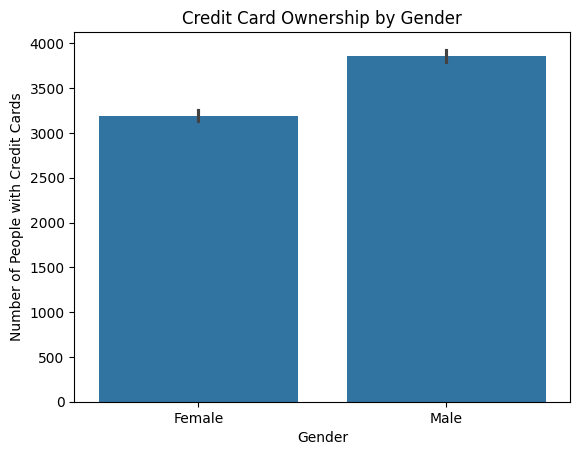

In [40]:
sns.barplot(x='gender', y='credit_card', data=dataset, estimator=sum)

plt.title("Credit Card Ownership by Gender")
plt.ylabel("Number of People with Credit Cards")
plt.xlabel("Gender")
plt.show()

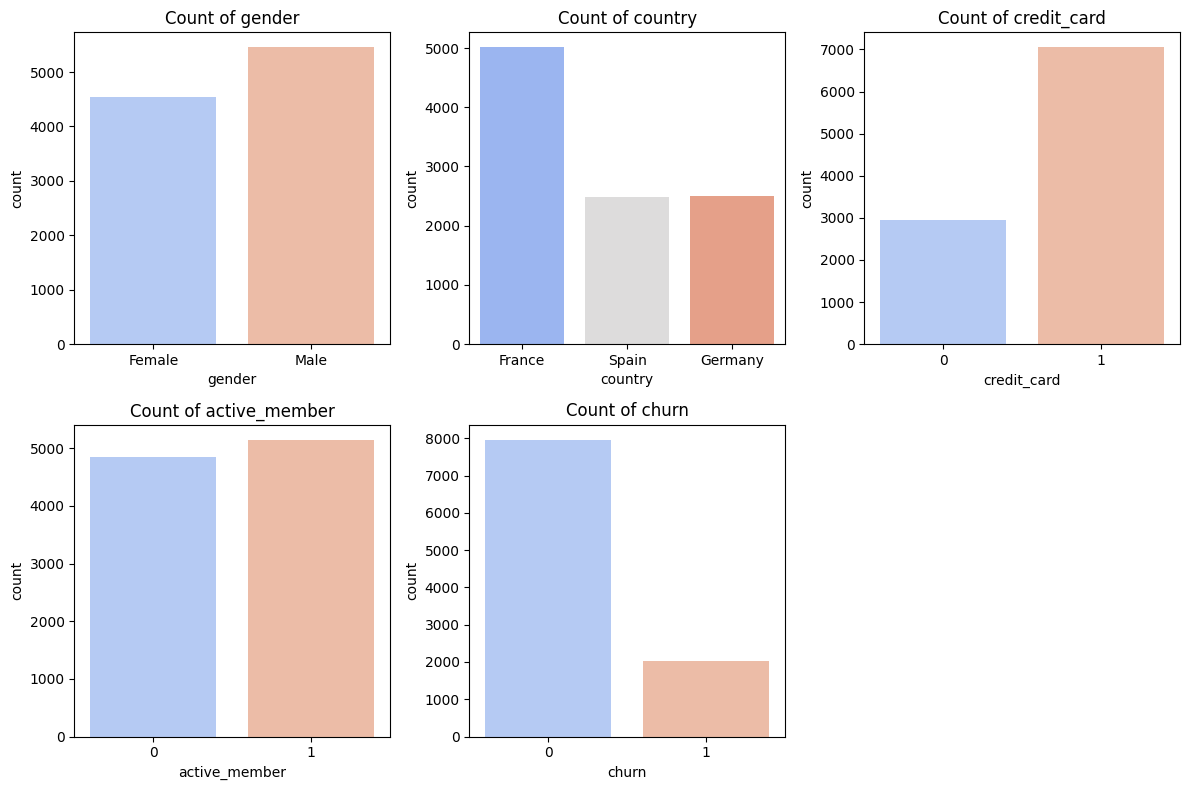

In [46]:
# List of categorical columns
cat_features = ['gender', 'country', 'credit_card', 'active_member', 'churn']

# Create bar plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=dataset, palette="coolwarm")
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()

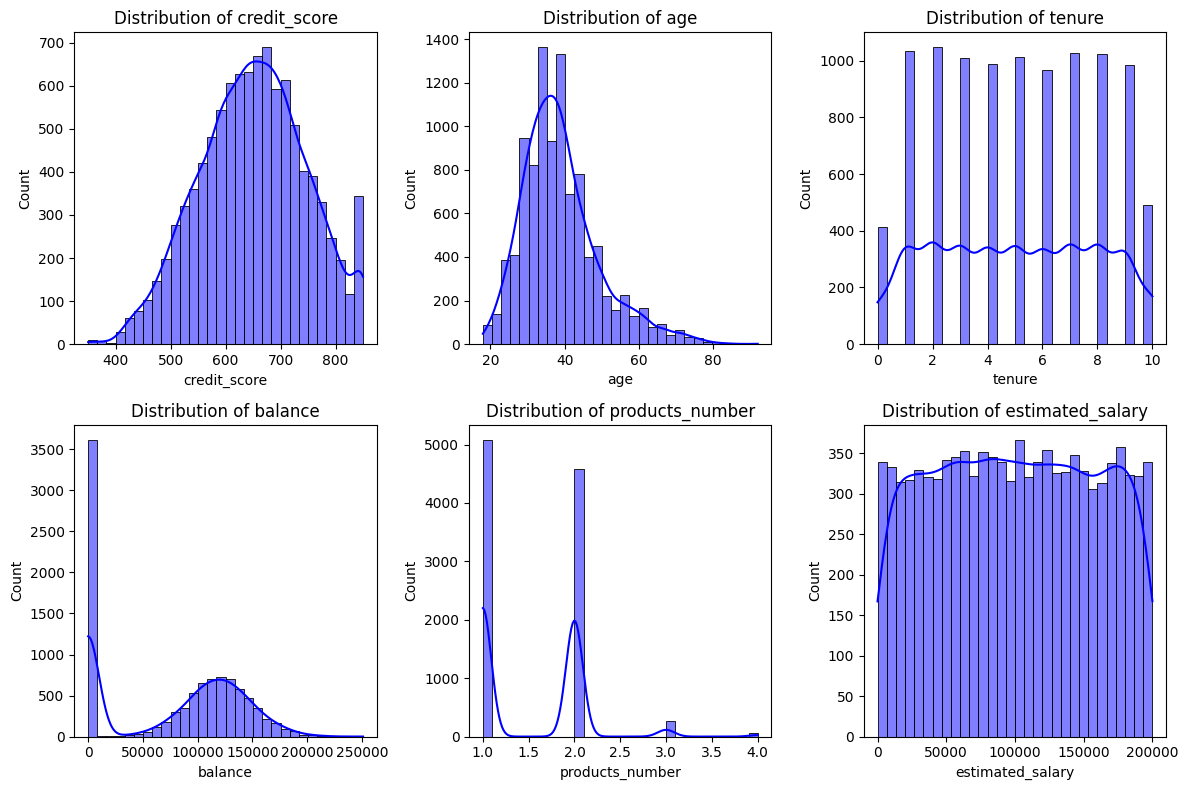

In [47]:
# List of numerical columns
num_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Create histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()